MixUp

In [37]:
# import libraries
from PIL import Image
import os
from random import randint
import numpy as np
import matplotlib.pyplot as plt

In [38]:
# Get the path to the PIL.Image library's directory
image_path = os.path.dirname(os.path.abspath(Image.__file__))


In [39]:
# Iterate over all the directories inside the PIL.Image library's directory
for dirpath, dirnames, filenames in os.walk(image_path):
    print(f"Contents of directory {dirpath}:")
    for filename in filenames:
        print(f"\t{filename}")

Contents of directory /home/zeelshah/.local/lib/python3.10/site-packages/PIL:
	ImageWin.py
	ImageFont.py
	JpegPresets.py
	ImagePalette.py
	ImageMorph.py
	ImageGrab.py
	GimpPaletteFile.py
	ContainerIO.py
	_imagingcms.cpython-310-x86_64-linux-gnu.so
	TgaImagePlugin.py
	GdImageFile.py
	IcoImagePlugin.py
	PcfFontFile.py
	ImageDraw.py
	ImageFile.py
	MpoImagePlugin.py
	ImageSequence.py
	BdfFontFile.py
	ImImagePlugin.py
	_tkinter_finder.py
	ImageMath.py
	FontFile.py
	SgiImagePlugin.py
	QoiImagePlugin.py
	PcxImagePlugin.py
	PpmImagePlugin.py
	IptcImagePlugin.py
	PaletteFile.py
	SpiderImagePlugin.py
	ExifTags.py
	ImageColor.py
	WmfImagePlugin.py
	MpegImagePlugin.py
	WebPImagePlugin.py
	EpsImagePlugin.py
	PcdImagePlugin.py
	FitsStubImagePlugin.py
	features.py
	McIdasImagePlugin.py
	TiffImagePlugin.py
	BufrStubImagePlugin.py
	FliImagePlugin.py
	ImageFilter.py
	MspImagePlugin.py
	_deprecate.py
	_binary.py
	XbmImagePlugin.py
	FtexImagePlugin.py
	PngImagePlugin.py
	SunImagePlugin.py
	JpegImagePlugin

In [40]:
# open each image from the 'Image' library
img_folder = 'images/'
imgs = os.listdir(img_folder)

# set batch size to 10 ie open only 10 images at a time
# creat batch_x, a list of 10 images of 224x224 px
batch_x = [Image.open(img_folder + p).resize((224,224)) for p in imgs[0:10]]

In [41]:
def normalize_image(x):
    # change scale of image from 0-255 px to 0-1 px
    x = x / np.max(x)   # U can do so by dividing it with the max ie 255
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    return (x - mean) / std

In [42]:
def denormalize_image(x):       # opposite of normalization
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    x = std * x + mean
    x = np.clip(x, 0, 1)
    return x

In [62]:
lam = 0.70
batch_size = len(batch_x)
# normalise the currImage
current_image = normalize_image(np.array(batch_x[0]))   # taking 1st img as currImg
# get random index
random_index = randint(0, batch_size - 1)
random_image_from_batch = normalize_image(np.array(batch_x[random_index]))   # taking 1st img as currImg

(-0.5, 223.5, 223.5, -0.5)

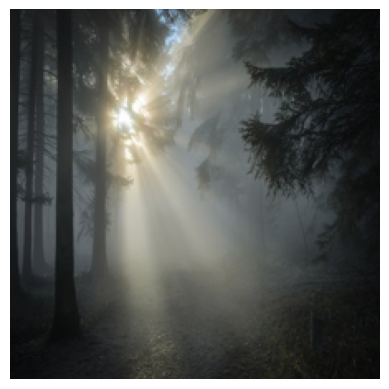

In [63]:
# display current image
plt.imshow(denormalize_image(current_image))
plt.axis("off")

(-0.5, 223.5, 223.5, -0.5)

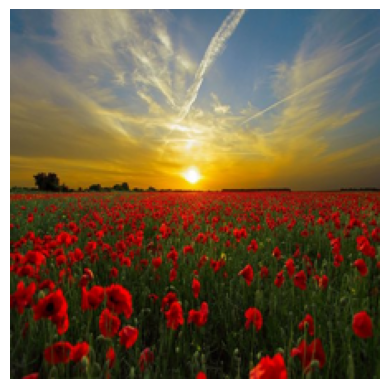

In [64]:
# display random image
plt.imshow(denormalize_image(random_image_from_batch))
plt.axis("off")

In [65]:
mixed_image = lam * current_image + (1 - lam) * random_image_from_batch

(-0.5, 223.5, 223.5, -0.5)

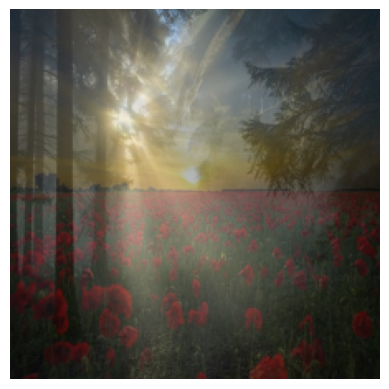

In [66]:
# display mixed image
plt.imshow(denormalize_image(mixed_image))
plt.axis("off")

Loss = lambda * XE(pred, y_a) + (1-lambda) * XE(pred, y_b) 
(Use Cross entropy Loss)

In [ ]:
# Loss
def mixup_data(x, y, alpha=1.0, use_cuda=True):
    if alpha > 0:
        lam = np.random.beta(alpha, alpha)
    else:
        
